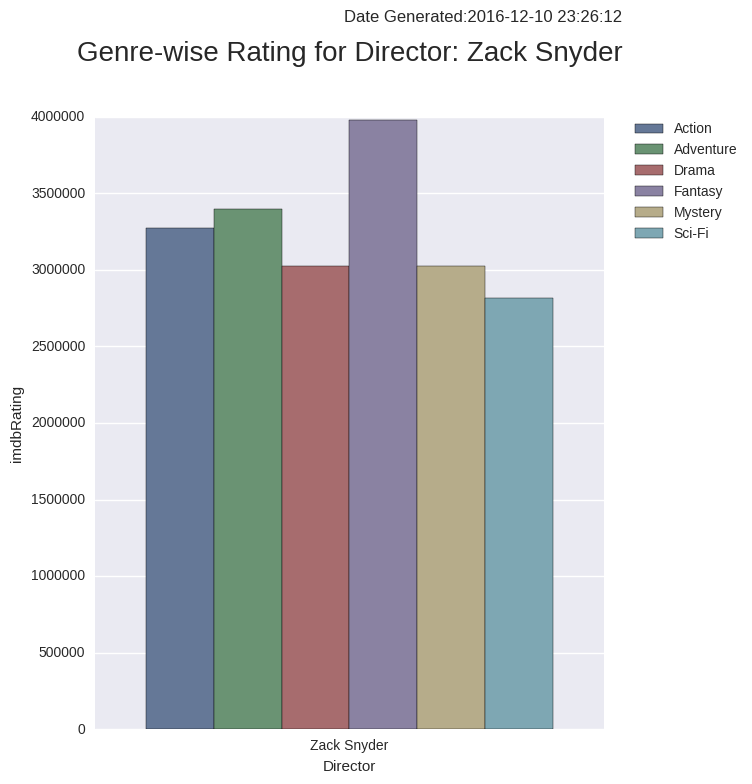

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.ticker as pltticker

#Zack Snyder
df=pd.read_csv('dir_genre_netrating.csv')
direct="Zack Snyder"
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(style="darkgrid")
plt.figure(figsize=(45,6))
df=df[df["Director"].str.contains(direct)]
ax=sns.factorplot(x="Director",y="imdbRating",hue="Genre",data=df,saturation=.5,size=7,aspect=.9,kind="bar",legend=False)

#ax.set(yticks=np.arange(0,5000000,1000000))
plt.title('Genre-wise Rating for Director: '+direct,fontsize=20,y=1.08)
#plt.xlabel(fontsize=15)
#plt.ylabel('Net Rating: (mean(Rating*Votes))',fontsize=15)
plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig('analysis1_dir_genre_netrating.png')
#ax.set_yticks(ax.get_yticks()[::2])

#sns_plot.savefig(rep_loc+'EPcurves_linear_'+str(ts)+'.pdf')

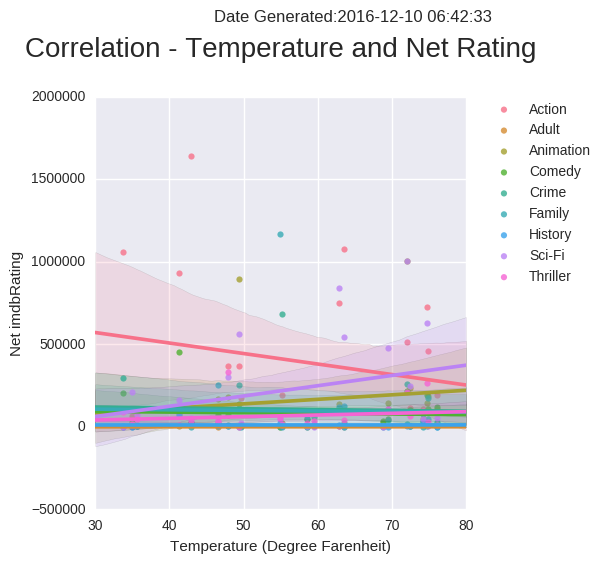

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('temp_genre_netrating.csv')
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(style="darkgrid")
fig = plt.figure()

l='Action,Adult,Animation,Comedy,Crime,Family,Sci-Fi,History,Thriller'
L=l.split(',')
df=df[df['Genre'].isin(L)]  
    
sns.lmplot(x="AvgTemp", y="imdbRating", hue='Genre',data=df,legend=False)

plt.title('Correlation - Temperature and Net Rating',fontsize=20,y=1.08)
plt.xlabel('Temperature (Degree Farenheit)')
plt.ylabel('Net imdbRating')

plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('analysis2_temp_genre_netrating.png')

0   2016-04-01
1   2016-08-01
2   2016-12-01
3   2016-02-01
4   2016-01-01
Name: time, dtype: datetime64[ns]


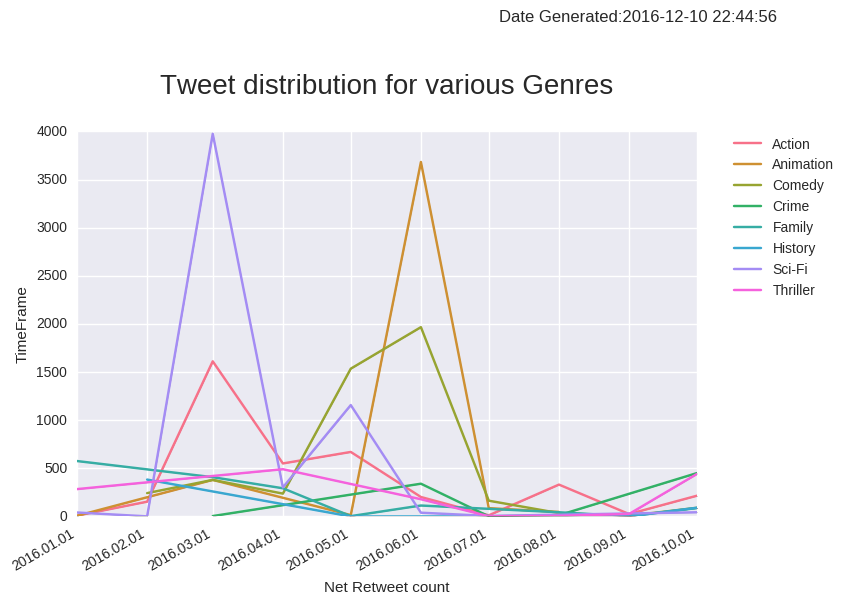

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import matplotlib.dates as mdates
df=pd.read_csv('tweets_genre_yrmnth.csv')
df.head(5)
def myFormatter(x,pos):
    return pd.to_datetime(x)


l='Action,Adult,Animation,Comedy,Crime,Family,Sci-Fi,History,Thriller'
L=l.split(',')
df=df[df['Genre'].isin(L)]  
df['time']=df['Released_Monthname'].astype(str)+df['created_year'].astype(str)
df['time']=df['time'].apply(lambda x: pd.to_datetime(str(x), format='%b%Y'))
print(df['time'].head(5))
#df['time']=df['time'].tolist()
#print(df['time'].dtype)
df['Dummy']=0
fig,ax=plt.subplots()
df['time']=df['time'].apply(lambda x: mdates.date2num(x))
#gammas=sns.load_dataset(df)
sns.tsplot(df,time="time",unit="Dummy",condition="Genre", value="calc_ret_fav_count",legend=True,ax=ax)
#ax.xaxis.set_major_formatter(plt.ticker.FuncFormatter(myFormatter))
#ax.xaxis.set_major_locator(df.time.AutoDateLocator())
#ax.xaxis.set_major_formatter(df.time.DateFormatter('%Y.%m'))

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))


plt.title('Tweet distribution for various Genres',fontsize=20,y=1.08)
plt.xlabel('Net Retweet count')
plt.ylabel('TimeFrame')

plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.autofmt_xdate()
fig1 = plt.gcf()
plt.show()
fig1.savefig("analysis3_tweets_genre_yrmnth.png")

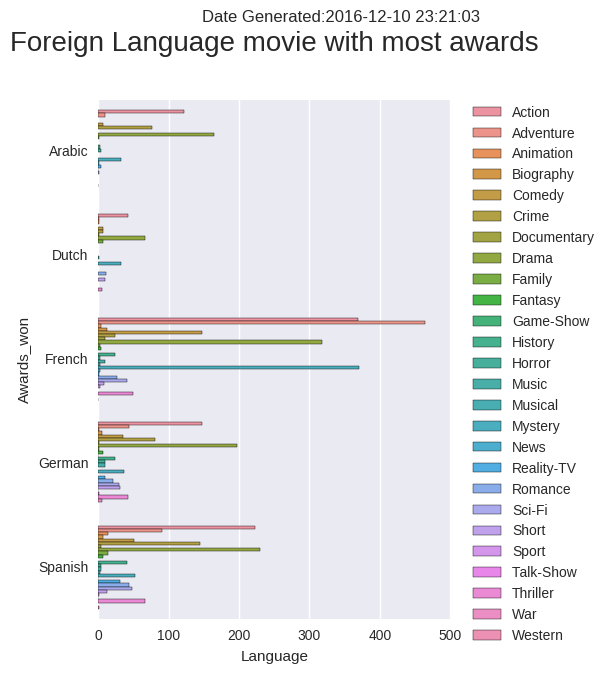

In [52]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('lang_genre_awards.csv')
df.head(5)
l='French,Arabic,Spanish,German,Dutch'
L=l.split(',')
df=df[df['Language'].isin(L)]  

sns.factorplot(x="Awards_won",y="Language",hue="Genre",data=df,saturation=.8,size=6,aspect=.8,kind="bar",legend=False)

plt.title('Foreign Language movie with most awards',fontsize=20,y=1.08)
plt.xlabel('Language')
plt.ylabel('Awards_won')

plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig1 = plt.gcf()
plt.show()
fig1.savefig("analysis5_lang_mov_most_awards.png")